# Questions

In [ ]:
import pandas as pd
import numpy as np
import math

In [24]:
mhz=pd.read_csv("challenge.txt",header=None,delimiter='\t')

In [25]:
mhz

,0,1,2,3,4,5,6,7,8,9
0,-0.768094,-1.062899,-1.502895,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.326407,-0.725706,-1.436839,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.870501,-0.944614,-0.796163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.198228,-0.633996,-1.031985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.581253,-0.839979,-0.762256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,8.615801,41.448963,3.758721,3.910819,0.0,0.0,0.0,0.0,0.0,0.0
996,8.360474,41.978658,2.164121,1.970064,0.0,0.0,0.0,0.0,0.0,0.0
997,7.575436,41.752979,1.839834,3.986019,0.0,0.0,0.0,0.0,0.0,0.0
998,5.955357,41.034620,3.164139,2.561729,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
mhz.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.768094,-1.062899,-1.502895,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.326407,-0.725706,-1.436839,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.870501,-0.944614,-0.796163,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.198228,-0.633996,-1.031985,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.581253,-0.839979,-0.762256,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
mhz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.3 KB


In [28]:
summary = mhz.describe().T
summary = summary.round(3)
summary

,count,mean,std,min,25%,50%,75%,max
0,1000.0,9.6,9.073,-1.999,0.309,7.299,19.455,22.693
1,1000.0,16.0,15.027,-2.334,0.360,19.141,21.242,42.932
2,1000.0,0.0,1.262,-2.540,-1.007,0.161,0.915,4.036
3,1000.0,0.0,0.998,-4.008,0.000,0.000,0.000,7.424
4,1000.0,0.0,0.446,-1.849,0.000,0.000,0.000,1.787
5,1000.0,-0.0,0.446,-1.759,0.000,0.000,0.000,1.883
6,1000.0,-0.0,0.446,-1.861,0.000,0.000,0.000,1.837
7,1000.0,0.0,0.446,-1.887,0.000,0.000,0.000,1.803
8,1000.0,0.0,0.446,-2.126,0.000,0.000,0.000,1.886
9,1000.0,0.0,0.446,-1.765,0.000,0.000,0.000,1.823


In [29]:
variance = mhz.median().to_frame().T.rename(index={0: 'median'})
variance

,0,1,2,3,4,5,6,7,8,9
median,7.299342,19.141101,0.16123,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
mhz.nunique()

0     901
1    1000
2     901
3     401
4     201
5     201
6     201
7     201
8     201
9     201
dtype: int64

In [31]:
Trows = mhz.shape[0]
drop = mhz.drop_duplicates()

In [32]:
Trows-drop.shape[0]

0

## Part1

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr


### Q1

In [34]:
mhz.shape

(1000, 10)

In [35]:
mhz.isnull().values.any()

False

In [36]:
stds = mhz.std()
low_variance_cols = stds[stds < 0.01].index.tolist()
print(low_variance_cols)


[]


In [37]:
total_rows = mhz.shape[0]
deduped = mhz.drop_duplicates()
deduped_rows = deduped.shape[0]

print(f"total_rows: {total_rows}")
print(f"deduped_rows: {deduped_rows}")
print(f"total_rows - deduped_rows: {total_rows - deduped_rows}")


total_rows: 1000
deduped_rows: 1000
total_rows - deduped_rows: 0


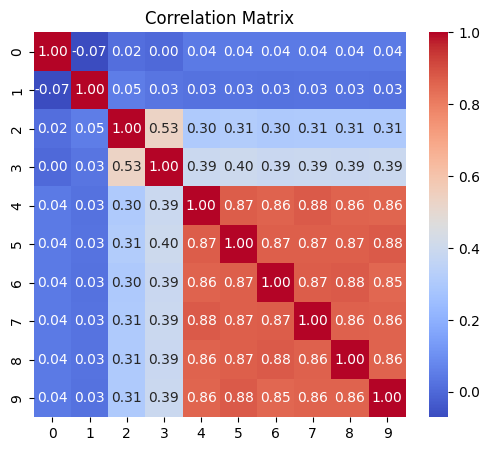

corr > 0.99:


In [38]:
corr_matrix = mhz.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
high_corr_pairs = []
threshold = 0.99
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if abs(corr_matrix.iat[i,j]) > threshold:
            high_corr_pairs.append((i, j, corr_matrix.iat[i,j]))

print("corr > 0.99:")
for i,j,val in high_corr_pairs:
    print(f"col {i} , col {j}: corr = {val:.3f}")


c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-package

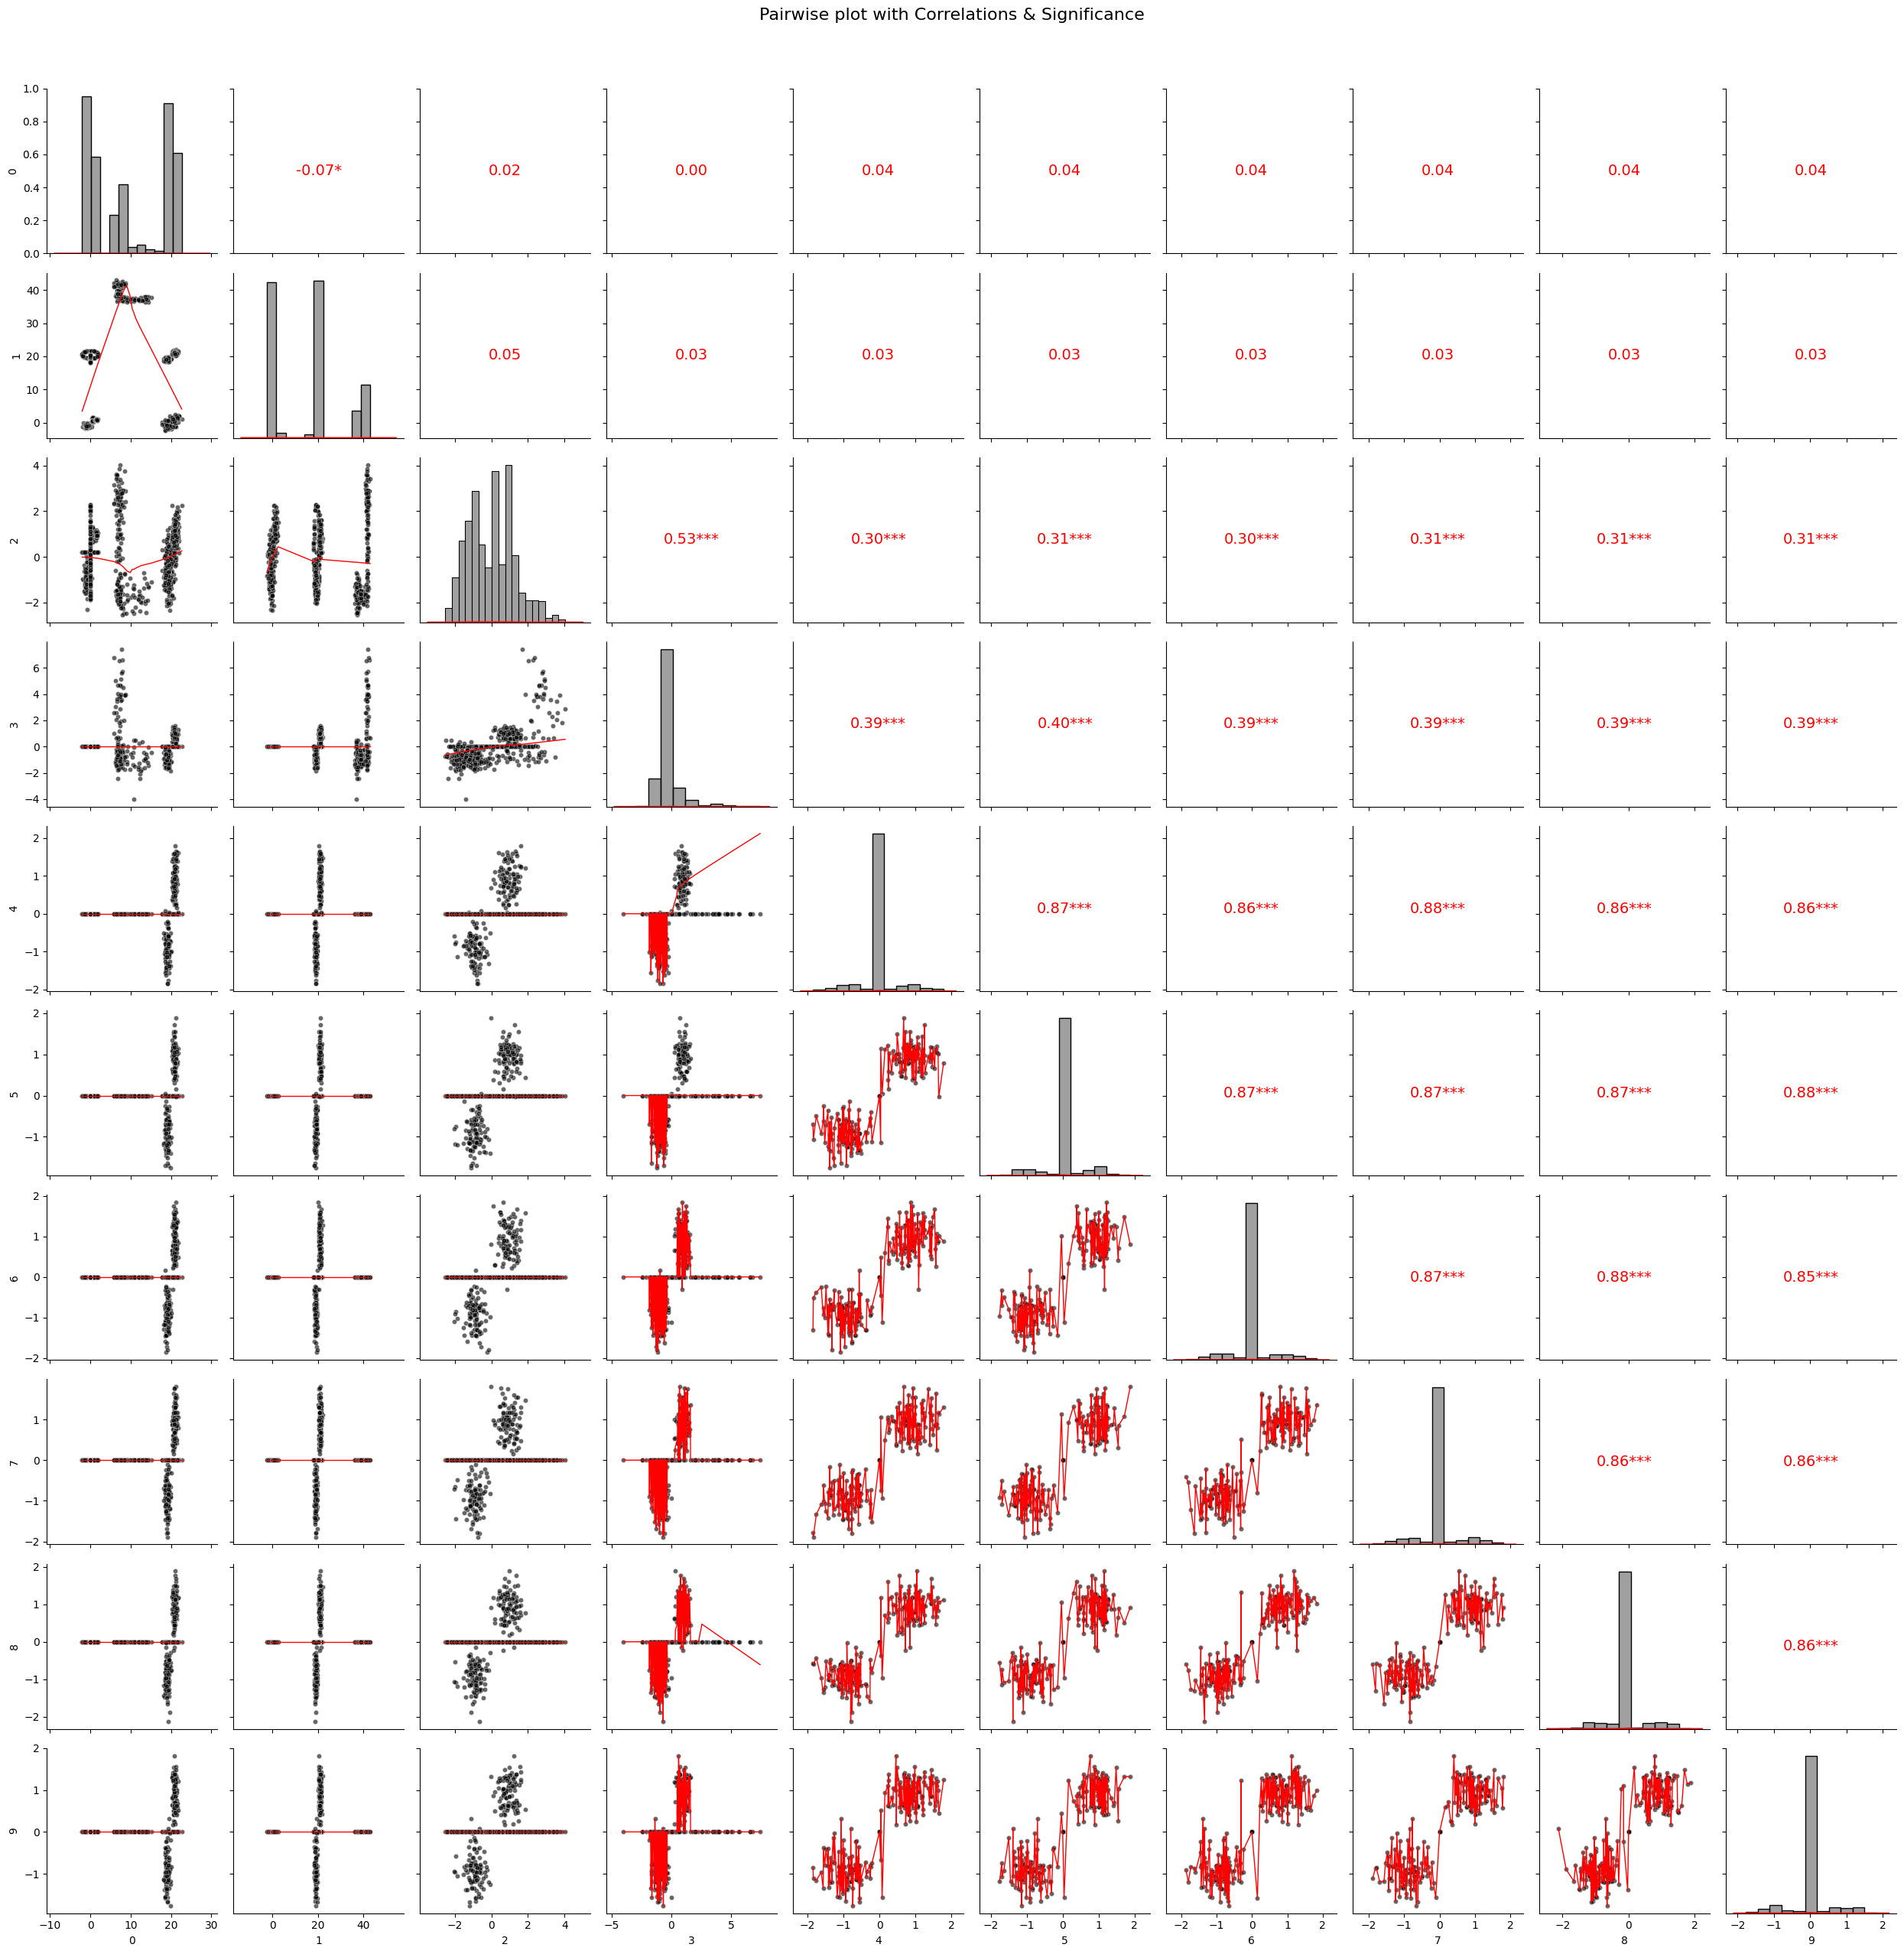

In [39]:

def corrfunc(x, y, **kws):
    r, p = pearsonr(x, y)
    stars = ""
    if p < 0.001:
        stars = "***"
    elif p < 0.01:
        stars = "**"
    elif p < 0.05:
        stars = "*"
    ax = plt.gca()
    ax.annotate(f"{r:.2f}{stars}", 
                xy=(.5, .5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=14, color='red')

vars_ = mhz.columns.tolist()
g = sns.PairGrid(mhz, vars=vars_, diag_sharey=False, height=2.5, aspect=1)

g.map_diag(sns.histplot, kde=False, color='gray', edgecolor='black')
g.map_diag(sns.kdeplot, color='red')

g.map_lower(sns.scatterplot, s=20, color='black', alpha=0.6)
g.map_lower(sns.regplot, scatter=False, lowess=True, color='red', line_kws={'lw':1})

g.map_upper(corrfunc)

for ax in g.axes.flatten():
    ax.grid(False)
g.fig.suptitle("Pairwise plot with Correlations & Significance", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


In [40]:
def mahalanobis_distances(df):
    X = df.values
    mu = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)
    inv_cov = np.linalg.inv(cov)
    diff = X - mu
    m_dist = np.sqrt(np.sum(diff.dot(inv_cov) * diff, axis=1))
    return m_dist

md = mahalanobis_distances(mhz)
alpha = 0.01
df_dim = mhz.shape[1]
chi2_thresh = np.sqrt(scipy.stats.chi2.ppf(1-alpha, df_dim))

outliers = np.where(md > chi2_thresh)[0]
print("(Mahalanobis):", len(outliers))
print("index:", outliers)


(Mahalanobis): 138
index: [600 601 602 603 606 609 610 611 614 616 618 619 621 622 623 624 625 629
 630 632 633 635 636 637 638 639 640 642 644 645 646 647 651 652 654 655
 658 659 660 661 662 664 666 667 668 669 670 672 673 674 677 678 680 681
 682 683 685 688 692 694 696 699 700 701 702 703 704 705 707 708 711 712
 714 715 717 719 720 721 722 725 728 729 730 732 733 734 735 739 740 741
 744 745 746 747 750 752 753 754 756 758 759 760 761 762 763 764 768 769
 772 774 776 779 780 781 782 784 786 787 788 789 791 794 795 796 797 798
 961 974 975 976 981 986 987 988 989 991 992 994]


### Q2

In [41]:
import sklearn
import pandas as pd
import plotly


#### PCA

##### n_components=2

In [42]:
pca = sklearn.decomposition.PCA(n_components=2, random_state=1377)
pca2 = pca.fit_transform(mhz)

In [43]:
df_pca = pd.DataFrame({
    'PC1': pca2[:, 0],
    'PC2': pca2[:, 1]
})

In [44]:
df_pca

,PC1,PC2
0,-16.342402,-11.483784
1,-15.968538,-12.018227
2,-16.214353,-11.575823
3,-15.883712,-11.882935
4,-16.129028,-11.280158
...,...,...
995,25.483462,0.724852
996,26.017412,0.498466
997,25.847401,-0.299102
998,25.241243,-1.960283


In [45]:
fig = plotly.graph_objects.Figure(
    data=[
        plotly.graph_objects.Scatter(x=df_pca['PC1'],y=df_pca['PC2'],mode='markers',
            marker={
                'size': 6,
                'opacity': 0.7,
                'color': 'steelblue'
            }
        )
    ]
)

In [46]:
fig.update_layout(title='2D PCA',xaxis_title='PC1',yaxis_title='PC2',width=700,height=500
)

In [47]:
fig.write_image("pca_2d_plot.png", width=700, height=500, scale=5)

##### n_components=3

In [48]:
pca_3 = sklearn.decomposition.PCA(n_components=3, random_state=1377)
pca3 = pca_3.fit_transform(mhz)

In [49]:
df_pca3 = pd.DataFrame({
    'PC1': pca3[:, 0],
    'PC2': pca3[:, 1],
    'PC3': pca3[:, 2]
})

In [50]:
fig = plotly.graph_objects.Figure(
    data=[plotly.graph_objects.Scatter3d(x=df_pca3['PC1'],y=df_pca3['PC2'],z=df_pca3['PC3'],mode='markers',
            marker={
                'size': 4,
                'opacity': 0.7,
                'color': 'steelblue'
            }
        )
    ]
)

In [51]:
fig.update_layout(
    title='3D PCA',scene=dict(xaxis_title='PC1',yaxis_title='PC2',zaxis_title='PC3'),
    width=700,
    height=500
)
fig.show()

In [52]:
fig.write_image("pca_3d_plot.png", width=700, height=500, scale=5)

##### t-SNE

##### 2

In [53]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=1377)
tsne2 = tsne.fit_transform(mhz)

In [54]:
df_tsne = pd.DataFrame({
    'PC1': tsne2[:, 0],
    'PC2': tsne2[:, 1]
})

In [55]:
fig = plotly.graph_objects.Figure(
    data=[
        plotly.graph_objects.Scatter(x=df_tsne['PC1'],y=df_tsne['PC2'],mode='markers',
            marker={
                'size': 6,
                'opacity': 0.7,
                'color': 'steelblue'
            }
        )
    ]
)

In [56]:
fig.update_layout(
    title='2D t-SNE',
    xaxis_title='PC1',
    yaxis_title='PC2',
    width=700,
    height=500
)

In [57]:
fig.write_image("tsne_2d_plot.png", width=700, height=500, scale=5)

##### 3

In [58]:
tsne = sklearn.manifold.TSNE(n_components=3,perplexity=30,random_state=1377,max_iter=1000)
tsne3 = tsne.fit_transform(mhz)

In [59]:
df_tsne3 = pd.DataFrame({
    'Dim1': tsne3[:, 0],
    'Dim2': tsne3[:, 1],
    'Dim3': tsne3[:, 2]
})

In [60]:
fig = plotly.graph_objects.Figure(
    data=[plotly.graph_objects.Scatter3d(x=df_tsne3['Dim1'],y=df_tsne3['Dim2'],z=df_tsne3['Dim3'],mode='markers',
            marker={
                'size': 4,
                'opacity': 0.7,
                'color': 'firebrick'
            }
        )
    ]
)

In [61]:
fig.update_layout(
    title='3D t-SNE',
    scene=dict(
        xaxis_title='t-SNE Dim 1',
        yaxis_title='t-SNE Dim 2',
        zaxis_title='t-SNE Dim 3'
    ),
    width=800,
    height=600
)
fig.show()

In [62]:
fig.write_image("tsne_3d_plot.png", width=800, height=600, scale=5)

### Q3

In [63]:
stats_df = pd.DataFrame({
    'mean': mhz.mean(),
    'median': mhz.median(),
    'std': mhz.std()
})
print("Basic descriptive statistics:")
print(stats_df)

Basic descriptive statistics:
           mean     median        std
0  9.600000e+00   7.299342   9.072724
1  1.600000e+01  19.141101  15.027236
2  7.105427e-17   0.161230   1.262376
3  7.105427e-17   0.000000   0.997996
4  5.684342e-17   0.000000   0.446317
5 -8.526513e-17   0.000000   0.446317
6 -2.842171e-17   0.000000   0.446317
7  4.973799e-17   0.000000   0.446317
8  7.105427e-17   0.000000   0.446317
9  3.552714e-17   0.000000   0.446317


In [64]:
normality = []
for col in mhz.columns:
    stat, p_value = scipy.stats.shapiro(mhz[col])
    normality.append({
        'feature': col,
        'shapiro_stat': stat,
        'p_value': p_value,
        'normal?': p_value > 0.05
    })

In [65]:
normality_df = pd.DataFrame(normality).set_index('feature')
print("\nShapiro-Wilk normality test:")
print(normality_df)


Shapiro-Wilk normality test:
         shapiro_stat       p_value  normal?
feature                                     
0            0.816866  3.092562e-32    False
1            0.844973  3.769083e-30    False
2            0.976190  9.798804e-12    False
3            0.675669  5.984401e-40    False
4            0.626179  5.325333e-42    False
5            0.633450  1.030754e-41    False
6            0.629329  7.080057e-42    False
7            0.629753  7.357839e-42    False
8            0.631111  8.324914e-42    False
9            0.629239  7.022217e-42    False


In [66]:
non_normal = normality_df[normality_df['normal?'] == False]
print("\nFeatures with non-normal distribution (p < 0.05):")
print(non_normal)


Features with non-normal distribution (p < 0.05):
         shapiro_stat       p_value  normal?
feature                                     
0            0.816866  3.092562e-32    False
1            0.844973  3.769083e-30    False
2            0.976190  9.798804e-12    False
3            0.675669  5.984401e-40    False
4            0.626179  5.325333e-42    False
5            0.633450  1.030754e-41    False
6            0.629329  7.080057e-42    False
7            0.629753  7.357839e-42    False
8            0.631111  8.324914e-42    False
9            0.629239  7.022217e-42    False


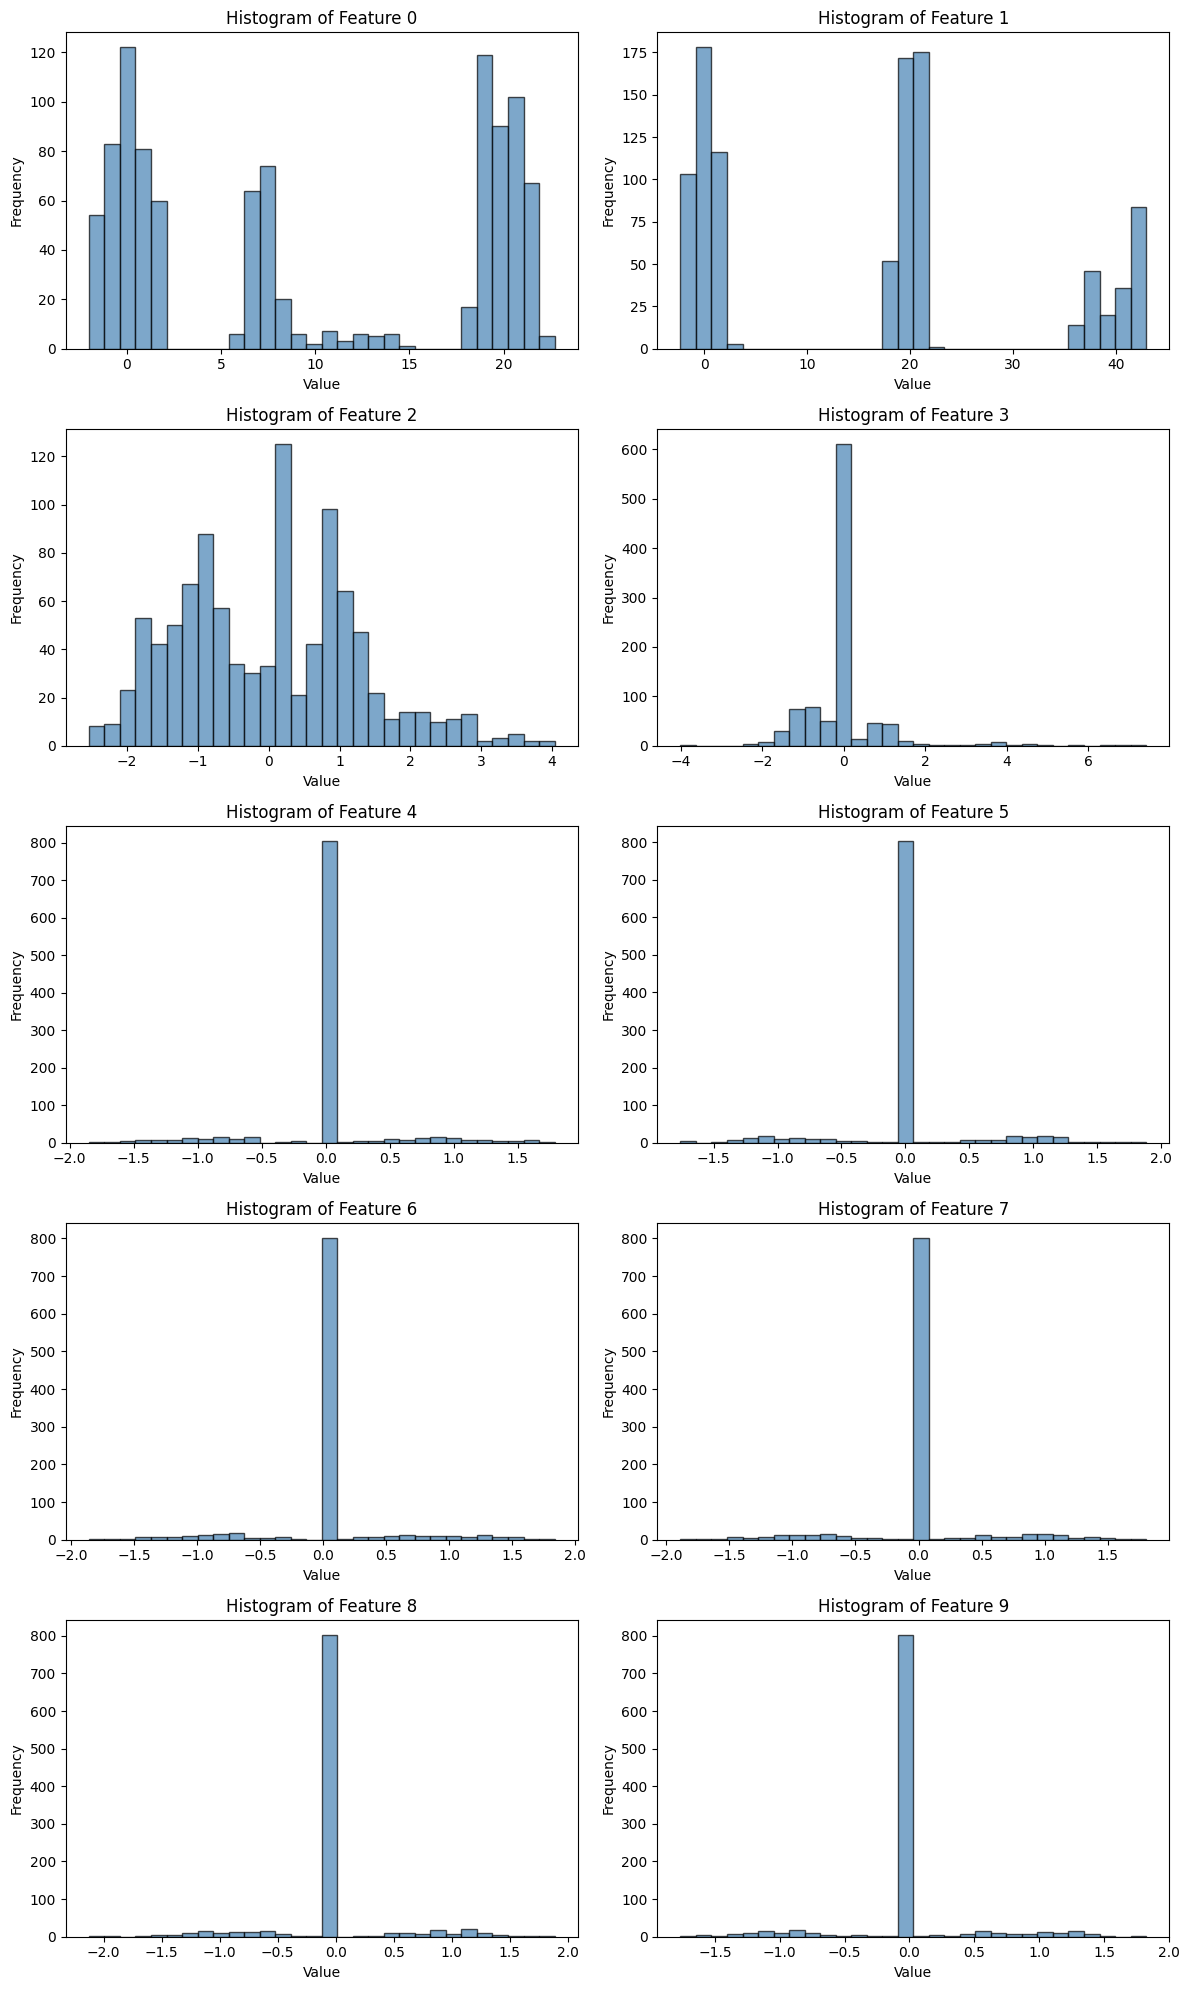

In [67]:
n_features = mhz.shape[1]  
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()
for i in range(n_features):
    ax = axes[i]
    ax.hist(mhz[i], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram of Feature {i}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [68]:
mhz = pd.read_csv('challenge.txt', delimiter='\t', header=None)
desc = mhz.describe().T 
desc['variance'] = mhz.var()
desc['median'] = mhz.median()
stats_table = desc[['count', 'mean', 'median', 'std', 'variance', 'min', '25%', '50%', '75%', 'max']]
stats_table = stats_table.round(2)
print(stats_table)


    count  mean  median    std  variance   min   25%    50%    75%    max
0  1000.0   9.6    7.30   9.07     82.31 -2.00  0.31   7.30  19.45  22.69
1  1000.0  16.0   19.14  15.03    225.82 -2.33  0.36  19.14  21.24  42.93
2  1000.0   0.0    0.16   1.26      1.59 -2.54 -1.01   0.16   0.92   4.04
3  1000.0   0.0    0.00   1.00      1.00 -4.01  0.00   0.00   0.00   7.42
4  1000.0   0.0    0.00   0.45      0.20 -1.85  0.00   0.00   0.00   1.79
5  1000.0  -0.0    0.00   0.45      0.20 -1.76  0.00   0.00   0.00   1.88
6  1000.0  -0.0    0.00   0.45      0.20 -1.86  0.00   0.00   0.00   1.84
7  1000.0   0.0    0.00   0.45      0.20 -1.89  0.00   0.00   0.00   1.80
8  1000.0   0.0    0.00   0.45      0.20 -2.13  0.00   0.00   0.00   1.89
9  1000.0   0.0    0.00   0.45      0.20 -1.77  0.00   0.00   0.00   1.82


## Part 2

In [69]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

#### K-means

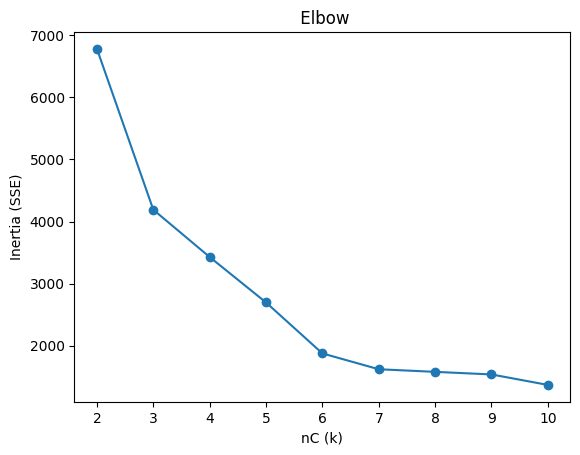

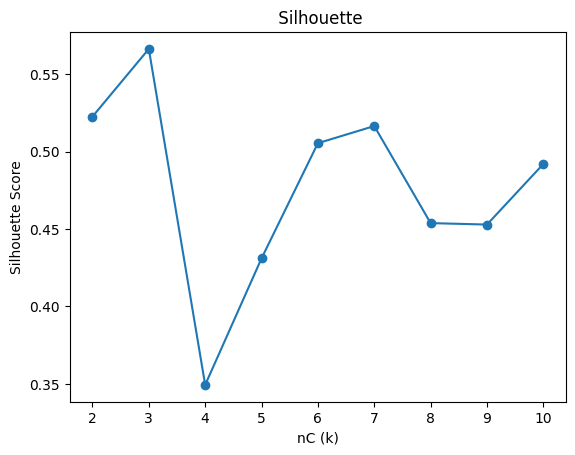

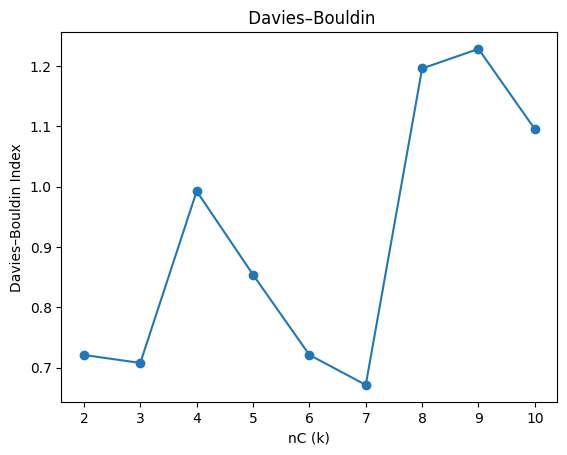

In [70]:
mhz = pd.read_csv('challenge.txt', delimiter='\t', header=None)
X = sklearn.preprocessing.StandardScaler().fit_transform(mhz)
inertias = []
sil_scores = []
db_scores = []
K = range(2, 11)

for k in K:
    km = sklearn.cluster.KMeans(n_clusters=k, random_state=1377).fit(X)
    labels = km.labels_

    inertias.append(km.inertia_)
    sil_scores.append(sklearn.metrics.silhouette_score(X, labels))
    db_scores.append(sklearn.metrics.davies_bouldin_score(X, labels))

plt.figure()
plt.plot(K, inertias, 'o-', markersize=6)
plt.xlabel('nC (k)')
plt.ylabel('Inertia (SSE)')
plt.title(' Elbow')
plt.show()

plt.figure()
plt.plot(K, sil_scores, 'o-', markersize=6)
plt.xlabel('nC (k)')
plt.ylabel('Silhouette Score')
plt.title(' Silhouette')
plt.show()

plt.figure()
plt.plot(K, db_scores, 'o-', markersize=6)
plt.xlabel('nC (k)')
plt.ylabel('Davies–Bouldin Index')
plt.title(' Davies–Bouldin')
plt.show()


In [71]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=1377)
labels_k = kmeans.fit_predict(X)

sil_k = sklearn.metrics.silhouette_score(X, labels_k)
print("K-Means: found", len(set(labels_k)), "clusters; silhouette =", round(sil_k, 3))

K-Means: found 3 clusters; silhouette = 0.566


### DBSCAN

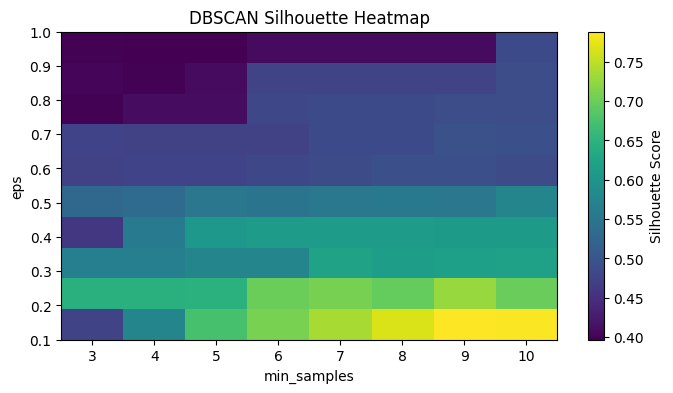

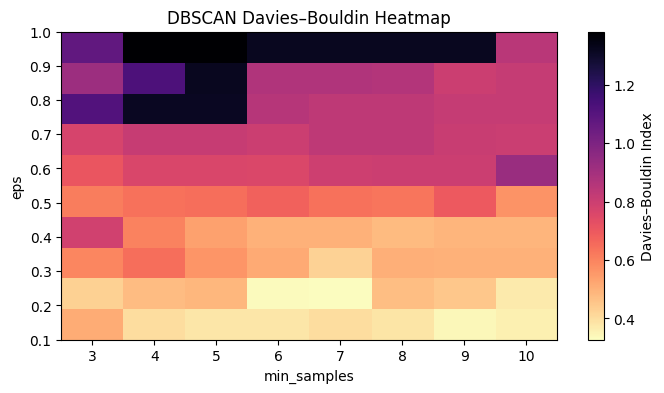

In [72]:
X = sklearn.preprocessing.StandardScaler().fit_transform(mhz)
eps_values = np.linspace(0.1, 1.0, 10)
min_samps  = range(3, 11)
sil_matrix = np.zeros((len(eps_values), len(min_samps)))
db_matrix  = np.zeros_like(sil_matrix)
cluster_count = np.zeros_like(sil_matrix)
noise_ratio   = np.zeros_like(sil_matrix)

for i, eps in enumerate(eps_values):
    for j, ms in enumerate(min_samps):
        db = sklearn.cluster.DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        cluster_count[i, j] = n_clusters
        
        noise_ratio[i, j] = (labels == -1).mean()
        
        mask = labels != -1
        if n_clusters >= 2:
            sil = sklearn.metrics.silhouette_score(X[mask], labels[mask])
            dbi = sklearn.metrics.davies_bouldin_score(X[mask], labels[mask])
        else:
            sil, dbi = np.nan, np.nan
        
        sil_matrix[i, j] = sil
        db_matrix[i, j]  = dbi

plt.figure(figsize=(8, 4))
plt.imshow(sil_matrix, origin='lower', 
           extent=[min(min_samps)-0.5, max(min_samps)+0.5, eps_values[0], eps_values[-1]],
           aspect='auto', cmap='viridis')
plt.colorbar(label='Silhouette Score')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('DBSCAN Silhouette Heatmap')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(db_matrix, origin='lower',
           extent=[min(min_samps)-0.5, max(min_samps)+0.5, eps_values[0], eps_values[-1]],
           aspect='auto', cmap='magma_r')
plt.colorbar(label='Davies–Bouldin Index')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('DBSCAN Davies–Bouldin Heatmap')
plt.show()


DBSCAN: found 8 clusters, noise points = 575
Silhouette Score = 0.788
Davies–Bouldin Index = 0.340


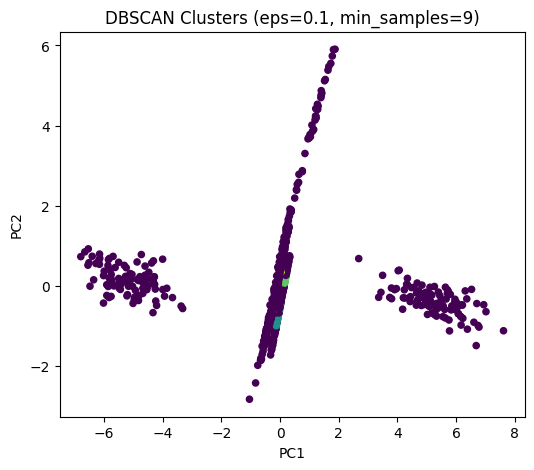

In [73]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

mhz = pd.read_csv('challenge.txt', delimiter='\t', header=None)
X = sklearn.preprocessing.StandardScaler().fit_transform(mhz)

db = sklearn.cluster.DBSCAN(eps=0.1, min_samples=9)
labels = db.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise   = (labels == -1).sum()
print(f"DBSCAN: found {n_clusters} clusters, noise points = {n_noise}")

mask = labels != -1
if n_clusters >= 2:
    sil = sklearn.metrics.silhouette_score(X[mask], labels[mask])
    dbi = sklearn.metrics.davies_bouldin_score(X[mask], labels[mask])
    print(f"Silhouette Score = {sil:.3f}")
    print(f"Davies–Bouldin Index = {dbi:.3f}")
else:
    print(" Silhouette , Davies–Bouldin")

X_pca = PCA(n_components=2, random_state=1377).fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=20)
plt.title('DBSCAN Clusters (eps=0.1, min_samples=9)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### Agglomerative

In [74]:
mhz = pd.read_csv('challenge.txt', delimiter='\t', header=None)
X = sklearn.preprocessing.StandardScaler().fit_transform(mhz)
print("Data shape:", X.shape)

Data shape: (1000, 10)


In [75]:
agg = sklearn.cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)
unique, counts = np.unique(labels_agg, return_counts=True)
print("Clusters found:", dict(zip(unique, counts)))

Clusters found: {0: 800, 1: 100, 2: 100}


In [76]:
sil_agg = sklearn.metrics.silhouette_score(X, labels_agg)
dbi_agg = sklearn.metrics.davies_bouldin_score(X, labels_agg)

print(f"Hierarchical Silhouette Score = {sil_agg:.3f}")
print(f"Hierarchical Davies–Bouldin Index = {dbi_agg:.3f}")

Hierarchical Silhouette Score = 0.566
Hierarchical Davies–Bouldin Index = 0.708


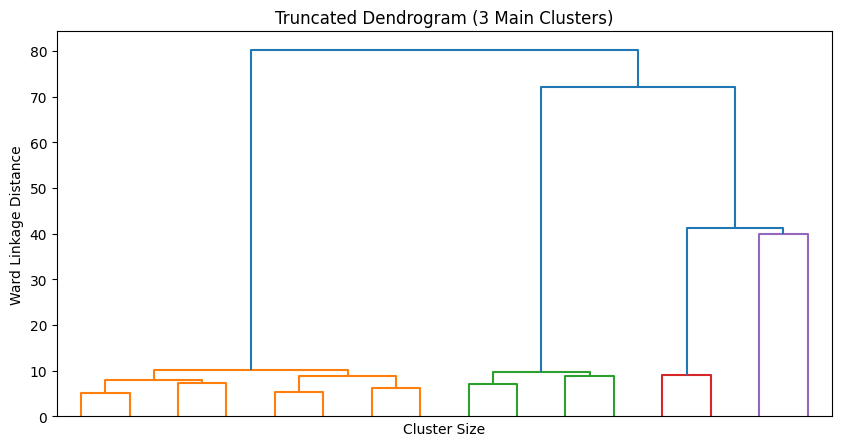

In [79]:
Z = scipy.cluster.hierarchy.linkage(X, method='ward')

plt.figure(figsize=(10, 5))
scipy.cluster.hierarchy.dendrogram(
    Z,
    truncate_mode='level',
    p=3,
    show_leaf_counts=True,
    no_labels=True,
    color_threshold=Z[-3, 2]
)
plt.title('Truncated Dendrogram (3 Main Clusters)')
plt.xlabel('Cluster Size')
plt.ylabel('Ward Linkage Distance')
plt.show()


## Part 3

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import umap.umap_ as umap
from scipy.stats import chi2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [81]:
X = StandardScaler().fit_transform(mhz)
labels_k = KMeans(n_clusters=3, random_state=1377).fit_predict(X)
n_neighbors_list = [5, 10, 15, 30, 50]
min_dist_list    = [0.01, 0.1, 0.3, 0.5]
results = []
for nn in n_neighbors_list:
    for md in min_dist_list:
        reducer = umap.UMAP(
            n_neighbors=nn,
            min_dist=md,
            n_components=2,
            random_state=1377
        )
        embedding = reducer.fit_transform(X)
        
        tw =sklearn.manifold.trustworthiness(X, embedding, n_neighbors=15)
        
        sil = sklearn.metrics.silhouette_score(embedding, labels_k)
        
        results.append({
            'n_neighbors': nn,
            'min_dist': md,
            'trustworthiness': round(tw, 3),
            'silhouette': round(sil, 3)
        })

df_results = pd.DataFrame(results)
print(df_results.pivot(index='n_neighbors', columns='min_dist'))

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for para

            trustworthiness                      silhouette                \
min_dist               0.01   0.10   0.30   0.50       0.01   0.10   0.30   
n_neighbors                                                                 
5                     0.989  0.989  0.987  0.991      0.330  0.366  0.286   
10                    0.992  0.994  0.992  0.995      0.399  0.427  0.197   
15                    0.994  0.993  0.994  0.994      0.327  0.468  0.303   
30                    0.994  0.994  0.994  0.994      0.458  0.262  0.151   
50                    0.994  0.994  0.994  0.994      0.279  0.217  0.175   

                    
min_dist      0.50  
n_neighbors         
5            0.214  
10           0.323  
15           0.371  
30           0.219  
50           0.192  


### n_components=2

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



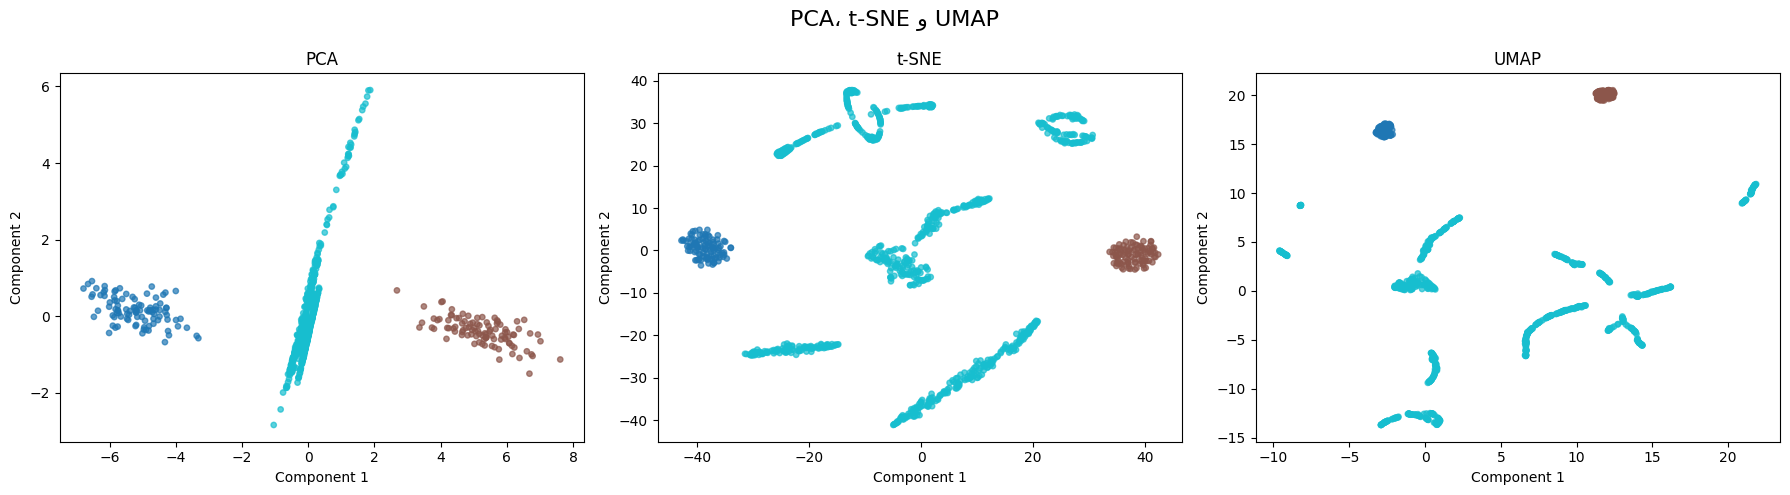

In [82]:
mhz = pd.read_csv('challenge.txt', delimiter='\t', header=None)
X = StandardScaler().fit_transform(mhz)
labels = KMeans(n_clusters=3, random_state=1377).fit_predict(X)
X_pca  = PCA(n_components=2, random_state=1377).fit_transform(X)
X_tsne = TSNE(n_components=2, random_state=1377).fit_transform(X)
X_umap = umap.UMAP(n_components=2, random_state=1377).fit_transform(X)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=100)
for ax, data, title in zip(axes,
                          [X_pca, X_tsne, X_umap],
                          ['PCA', 't-SNE', 'UMAP']):
    sc = ax.scatter(data[:, 0], data[:, 1], c=labels,
                    s=15, alpha=0.7, cmap='tab10')
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
fig.suptitle('PCA، t-SNE و UMAP', fontsize=16)
plt.tight_layout()
plt.show()

### n_components=3

c:\Users\sobhan rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



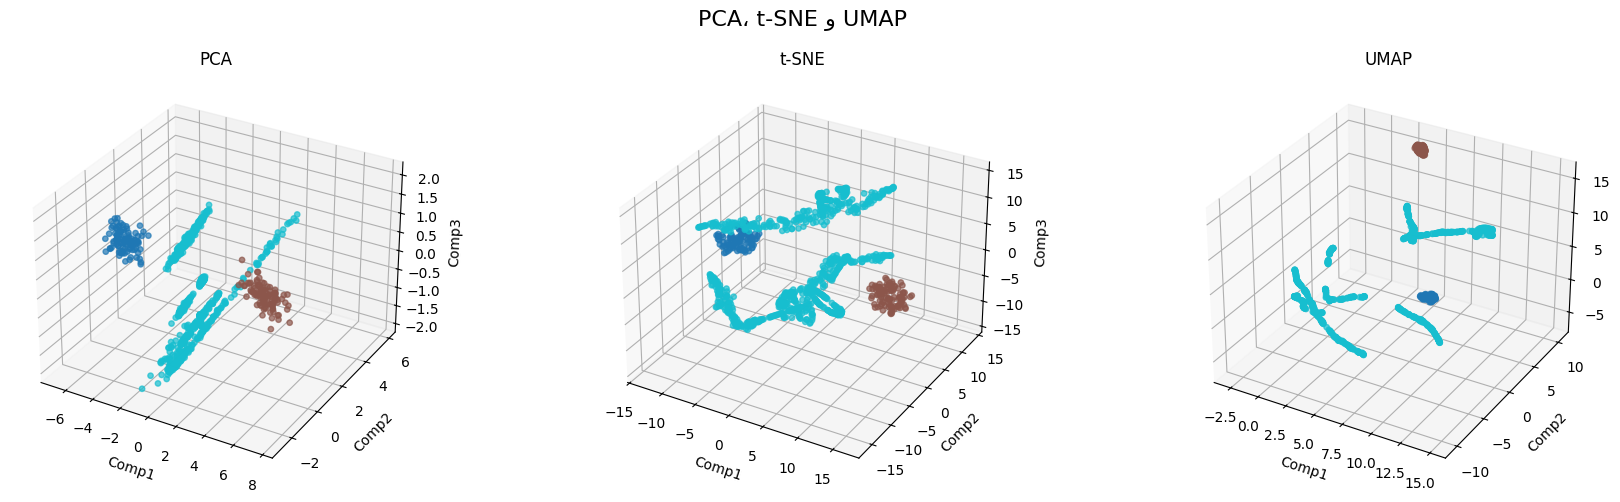

In [83]:
mhz = pd.read_csv('challenge.txt', delimiter='\t', header=None)
X = StandardScaler().fit_transform(mhz)
labels = KMeans(n_clusters=3, random_state=1377).fit_predict(X)
X_pca  = PCA(n_components=3, random_state=1377).fit_transform(X)
X_tsne = TSNE(n_components=3, random_state=1377).fit_transform(X)
X_umap = umap.UMAP(n_components=3, random_state=1377).fit_transform(X)
methods = [('PCA',  X_pca), 
           ('t-SNE', X_tsne), 
           ('UMAP', X_umap)]

fig = plt.figure(figsize=(18, 5), dpi=100)
for i, (name, data) in enumerate(methods, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2],
               c=labels, s=15, alpha=0.7, cmap='tab10')
    ax.set_title(name)
    ax.set_xlabel('Comp1')
    ax.set_ylabel('Comp2')
    ax.set_zlabel('Comp3')

fig.suptitle('PCA، t-SNE و UMAP', fontsize=16)
plt.tight_layout()
plt.show()


### MAhala

In [84]:
mhz = pd.read_csv('challenge.txt', delimiter='\t', header=None)
mu = mhz.mean().values              
cov = np.cov(mhz.values, rowvar=False)  
inv_cov = np.linalg.inv(cov)       
diff = mhz.values - mu
md2 = np.sum(diff.dot(inv_cov) * diff, axis=1)
p = mhz.shape[1]            
alpha = 0.01               
threshold = scipy.stats.chi2.ppf(1-alpha, df=p)
outlier_idx = np.where(md2 > threshold)[0]
print(f"Chi2 threshold (df={p}, α={alpha}): {threshold:.2f}")
print(f"Found {len(outlier_idx)} outliers at indices:", outlier_idx.tolist())


Chi2 threshold (df=10, α=0.01): 23.21
Found 138 outliers at indices: [600, 601, 602, 603, 606, 609, 610, 611, 614, 616, 618, 619, 621, 622, 623, 624, 625, 629, 630, 632, 633, 635, 636, 637, 638, 639, 640, 642, 644, 645, 646, 647, 651, 652, 654, 655, 658, 659, 660, 661, 662, 664, 666, 667, 668, 669, 670, 672, 673, 674, 677, 678, 680, 681, 682, 683, 685, 688, 692, 694, 696, 699, 700, 701, 702, 703, 704, 705, 707, 708, 711, 712, 714, 715, 717, 719, 720, 721, 722, 725, 728, 729, 730, 732, 733, 734, 735, 739, 740, 741, 744, 745, 746, 747, 750, 752, 753, 754, 756, 758, 759, 760, 761, 762, 763, 764, 768, 769, 772, 774, 776, 779, 780, 781, 782, 784, 786, 787, 788, 789, 791, 794, 795, 796, 797, 798, 961, 974, 975, 976, 981, 986, 987, 988, 989, 991, 992, 994]


In [85]:
df = pd.read_csv('challenge.txt', delimiter='\t', header=None)
scaler = StandardScaler()
X = scaler.fit_transform(df)
mu = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)
inv_cov = np.linalg.inv(cov)
diff = X - mu
md2 = np.sum(diff.dot(inv_cov) * diff, axis=1)
p = X.shape[1]
alpha = 0.01
threshold = scipy.stats.chi2.ppf(1 - alpha, df=p)
outlier_mask = md2 > threshold
df_clean = df.loc[~outlier_mask].reset_index(drop=True)
X_clean = X[~outlier_mask]
total_before = X.shape[0]
n_outliers = outlier_mask.sum()
total_after = X_clean.shape[0]
labels_before = KMeans(n_clusters=3, random_state=1377).fit_predict(X)
sil_before = silhouette_score(X, labels_before)

labels_after = KMeans(n_clusters=3, random_state=1377).fit_predict(X_clean)
sil_after = silhouette_score(X_clean, labels_after)

print(f"Total samples before: {total_before}")
print(f"Outliers removed:    {n_outliers}")
print(f"Remaining samples:   {total_after}")
print(f"Silhouette before:   {sil_before:.3f}")
print(f"Silhouette after:    {sil_after:.3f}")


Total samples before: 1000
Outliers removed:    138
Remaining samples:   862
Silhouette before:   0.566
Silhouette after:    0.386


### LOF

In [86]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
labels_lof = lof.fit_predict(X)  # 1 برای inlier و -1 برای outlier
inlier_mask = labels_lof == 1
df_lof_clean = df.loc[inlier_mask].reset_index(drop=True)
X_lof_clean = X[inlier_mask]
total_before = X.shape[0]
n_outliers_lof = (labels_lof == -1).sum()
total_after_lof = X_lof_clean.shape[0]
labels_k_before = KMeans(n_clusters=3, random_state=1377).fit_predict(X)
sil_before = silhouette_score(X, labels_k_before)

labels_k_after = KMeans(n_clusters=3, random_state=1377).fit_predict(X_lof_clean)
sil_after_lof = silhouette_score(X_lof_clean, labels_k_after)
results_lof = pd.DataFrame({
    'Metric': ['Total samples', 'Outliers removed', 'Remaining samples', 
               'Silhouette before', 'Silhouette after (LOF)'],
    'Value': [total_before, n_outliers_lof, total_after_lof, 
              round(sil_before, 3), round(sil_after_lof, 3)]
})
results_lof


,Metric,Value
0,Total samples,1000.000
1,Outliers removed,100.000
2,Remaining samples,900.000
3,Silhouette before,0.566
4,Silhouette after (LOF),0.276


### Isolation Forest

In [87]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
iso = IsolationForest(contamination=0.1, random_state=1377)
iso_labels = iso.fit_predict(X)  # 1 for inliers, -1 for outliers
inlier_mask = iso_labels == 1
df_iso_clean = df.loc[inlier_mask].reset_index(drop=True)
X_iso_clean = X[inlier_mask]
total_before = X.shape[0]
n_outliers_iso = (iso_labels == -1).sum()
total_after_iso = X_iso_clean.shape[0]
labels_k_before = KMeans(n_clusters=3, random_state=1377).fit_predict(X)
sil_before = silhouette_score(X, labels_k_before)

labels_k_after_iso = KMeans(n_clusters=3, random_state=1377).fit_predict(X_iso_clean)
sil_after_iso = silhouette_score(X_iso_clean, labels_k_after_iso)
results_iso = pd.DataFrame({
    'Metric': [
        'Total samples', 'Outliers removed', 'Remaining samples',
        'Silhouette before', 'Silhouette after (Isolation Forest)'
    ],
    'Value': [
        total_before, n_outliers_iso, total_after_iso,
        round(sil_before, 3), round(sil_after_iso, 3)
    ]
})

results_iso

,Metric,Value
0,Total samples,1000.000
1,Outliers removed,100.000
2,Remaining samples,900.000
3,Silhouette before,0.566
4,Silhouette after (Isolation Forest),0.397


In [88]:

scaler = StandardScaler()
X = scaler.fit_transform(df)

mu = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)
inv_cov = np.linalg.inv(cov)
diff = X - mu
md2 = np.sum(diff.dot(inv_cov) * diff, axis=1)
p = X.shape[1]
threshold_maha = chi2.ppf(0.99, df=p)
maha_outliers = md2 > threshold_maha
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_labels = lof.fit_predict(X)
lof_outliers = lof_labels == -1

iso = IsolationForest(contamination=0.1, random_state=1377)
iso_labels = iso.fit_predict(X)
iso_outliers = iso_labels == -1
outlier_votes = maha_outliers.astype(int) + lof_outliers.astype(int) + iso_outliers.astype(int)
combined_mask = outlier_votes >= 2

df_combined = df.loc[~combined_mask].reset_index(drop=True)
X_combined = X[~combined_mask]

total_before = X.shape[0]
n_outliers_combined = combined_mask.sum()
total_after = X_combined.shape[0]

labels_before = KMeans(n_clusters=3, random_state=1377).fit_predict(X)
sil_before = silhouette_score(X, labels_before)

labels_after = KMeans(n_clusters=3, random_state=1377).fit_predict(X_combined)
sil_after = silhouette_score(X_combined, labels_after)

results = pd.DataFrame({
    'Metric': [
        'Total samples', 'Combined outliers removed', 'Remaining samples',
        'Silhouette before', 'Silhouette after'
    ],
    'Value': [
        total_before, n_outliers_combined, total_after,
        round(sil_before, 3), round(sil_after, 3)
    ]
})
print(results.to_string(index=False))


                   Metric    Value
            Total samples 1000.000
Combined outliers removed   85.000
        Remaining samples  915.000
        Silhouette before    0.566
         Silhouette after    0.407


### Q3P3

In [89]:
df = pd.read_csv('challenge.txt', delimiter='\t', header=None)
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(df)

In [90]:
k = 3
labels = sklearn.cluster.KMeans(n_clusters=k, random_state=1377).fit_predict(X)
df['cluster'] = labels


In [91]:
desc = df.groupby('cluster') \
         .agg(['count','mean','median','std','min','max']) \
         .round(3)
print(desc)


            0                                            1                  \
        count    mean  median    std     min     max count    mean  median   
cluster                                                                      
0         100  19.069  19.028  0.387  18.148  20.141   100  19.067  19.025   
1         100  20.931  20.921  0.331  20.205  21.767   100  20.933  20.933   
2         800   7.000   3.857  8.296  -1.999  22.693   800  15.000  10.379   

                 ...      8                          9                       \
            std  ... median    std    min    max count   mean median    std   
cluster          ...                                                          
0         0.361  ... -0.893  0.366 -2.126 -0.030   100 -0.928 -0.942  0.386   
1         0.348  ...  0.932  0.383 -0.221  1.886   100  0.928  0.966  0.350   
2        16.646  ...  0.000  0.000  0.000  0.000   800  0.000  0.000  0.000   

                       
           min    max  
cluster 

In [92]:
anova_results = []
for col in df.columns[:-1]:
    groups = [df[df['cluster']==c][col] for c in sorted(df['cluster'].unique())]
    stat, p = scipy.stats.f_oneway(*groups)
    anova_results.append((col, stat, p))

anova_df = pd.DataFrame(anova_results, columns=['feature','F_stat','p_value'])
anova_df['significant'] = anova_df['p_value'] < 0.05
print(anova_df)

   feature       F_stat       p_value  significant
0        0   246.567890  9.918679e-88         True
1        1     9.397499  9.051294e-05         True
2        2    60.535859  1.539607e-25         True
3        3   106.723533  1.002430e-42         True
4        4  2852.209388  0.000000e+00         True
5        5  3869.433094  0.000000e+00         True
6        6  2862.019942  0.000000e+00         True
7        7  3118.781487  0.000000e+00         True
8        8  3073.360255  0.000000e+00         True
9        9  3197.654734  0.000000e+00         True


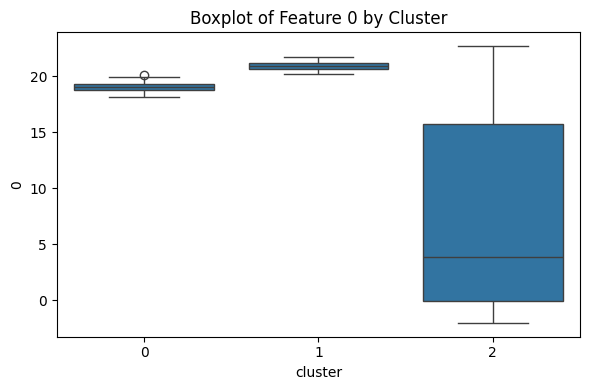

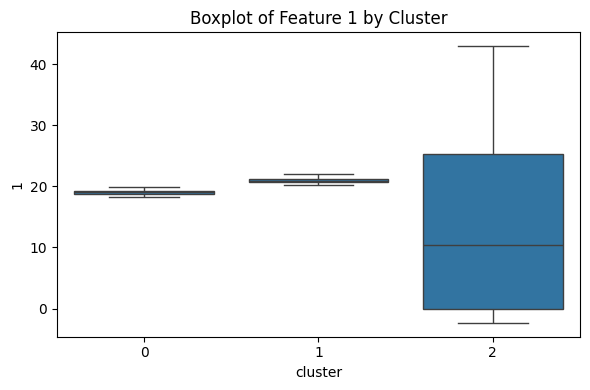

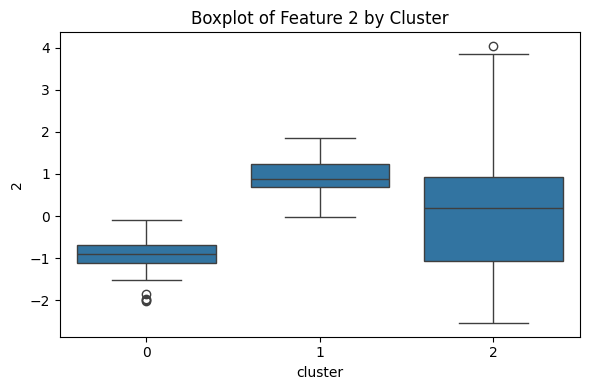

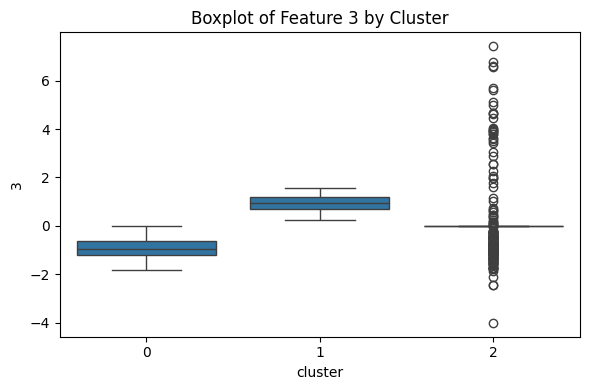

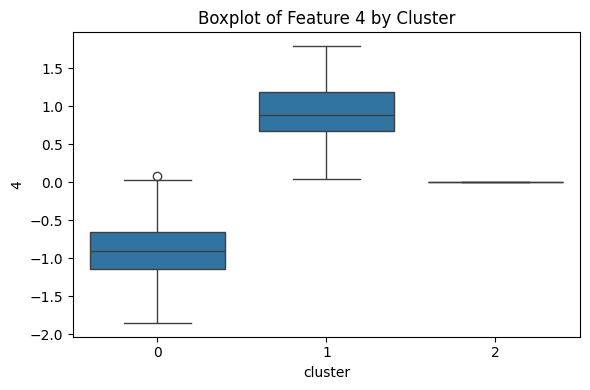

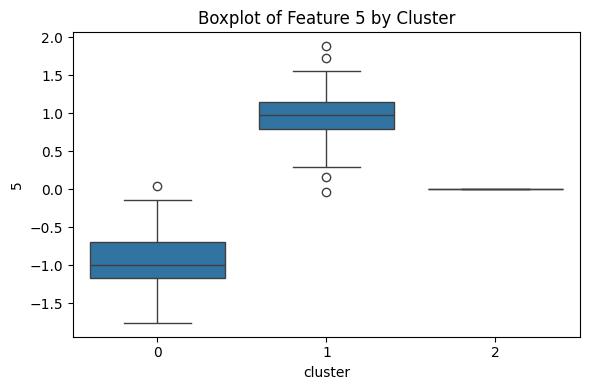

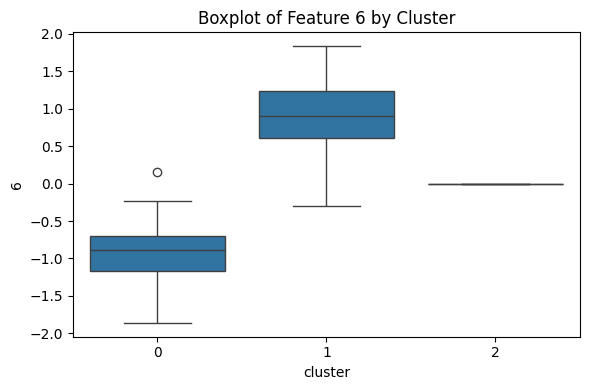

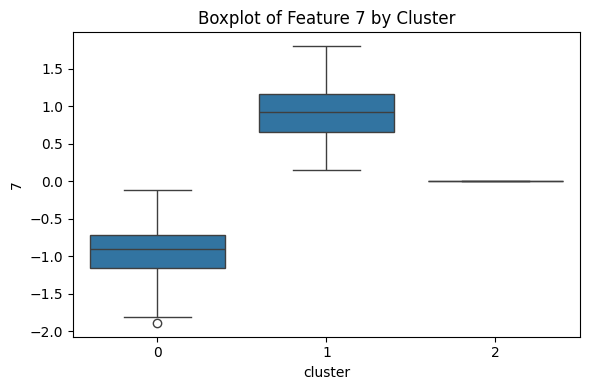

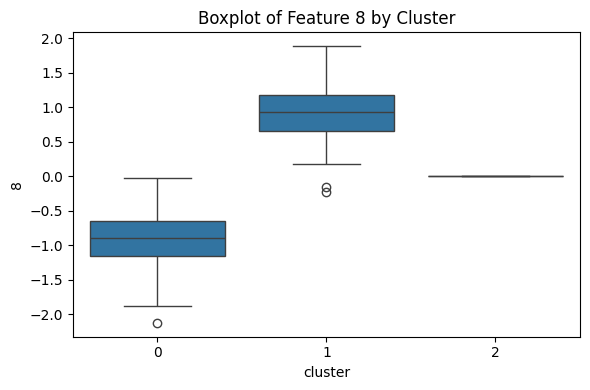

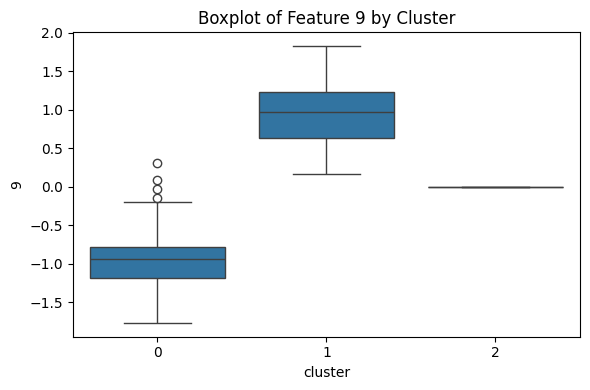

In [93]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'Boxplot of Feature {col} by Cluster')
    plt.tight_layout()
    plt.show()

### Q4P3

تعداد بوت‌استرپ: 100
میانگین ARI = 0.811
دامنه ARI   = 0.217 … 1.000


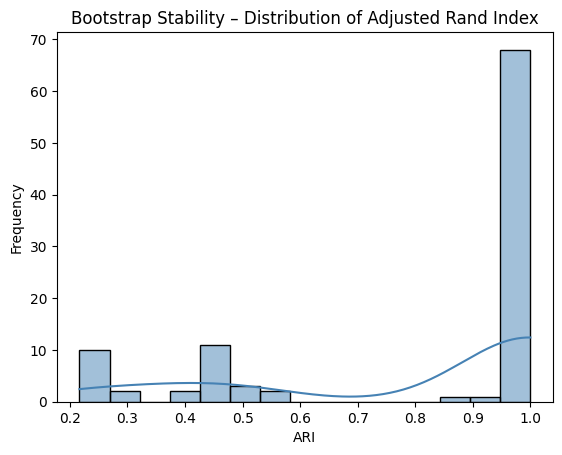

In [94]:
df   = pd.read_csv('challenge.txt', delimiter='\t', header=None)
X    = sklearn.preprocessing.StandardScaler().fit_transform(df)
k = 3
base_labels = sklearn.cluster.KMeans(n_clusters=k, random_state=1377).fit_predict(X)
n_iter = 100
ari_scores = []

rng = np.random.default_rng(seed=42)
for _ in range(n_iter):
    idx = rng.choice(len(X), size=len(X), replace=True)
    X_boot = X[idx]

    boot_labels = sklearn.cluster.KMeans(n_clusters=k, random_state=1377).fit_predict(X_boot)

    ari = sklearn.metrics.adjusted_rand_score(base_labels[idx], boot_labels)
    ari_scores.append(ari)

ari_scores = np.array(ari_scores)
print(f"تعداد بوت‌استرپ: {n_iter}")
print(f"میانگین ARI = {ari_scores.mean():.3f}")
print(f"دامنه ARI   = {ari_scores.min():.3f} … {ari_scores.max():.3f}")

sns.histplot(ari_scores, bins=15, kde=True, color='steelblue')
plt.title('Bootstrap Stability – Distribution of Adjusted Rand Index')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()
